<a href="https://colab.research.google.com/github/shwetamotewar/Deep-learning/blob/main/Handwritten_Digit_CNN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digit CNN Project Classification

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

## reading the handwritten digit dataset

In [8]:
from keras.datasets import mnist
(xtrain,ytrain), (xtest,ytest) = mnist.load_data()

In [4]:
xtrain.shape

(60000, 28, 28)

In [5]:
xtest.shape

(10000, 28, 28)

In [6]:
ytrain.shape

(60000,)

In [9]:
ytest.shape

(10000,)

In [10]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
xtest

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [13]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Viewing first image from train data

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

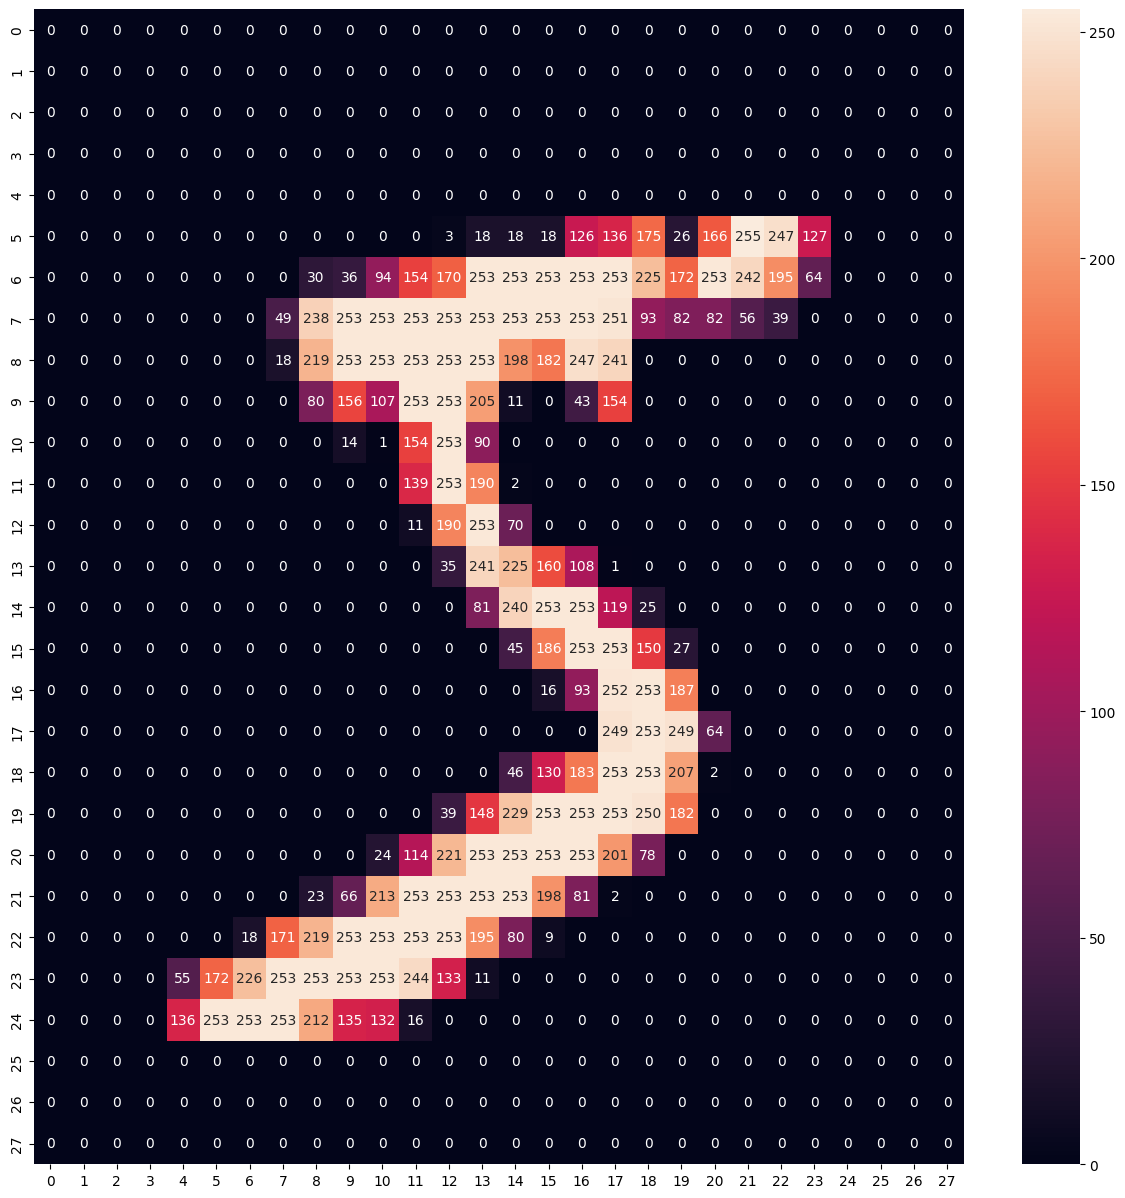

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True, fmt='d')
plt.show()

In [16]:
ytrain[0]

5

In [17]:
xtrain[0].shape

(28, 28)

## Visualizing first 9 images of xtrain data

In [20]:
for i in range(9):
  print(i)

0
1
2
3
4
5
6
7
8


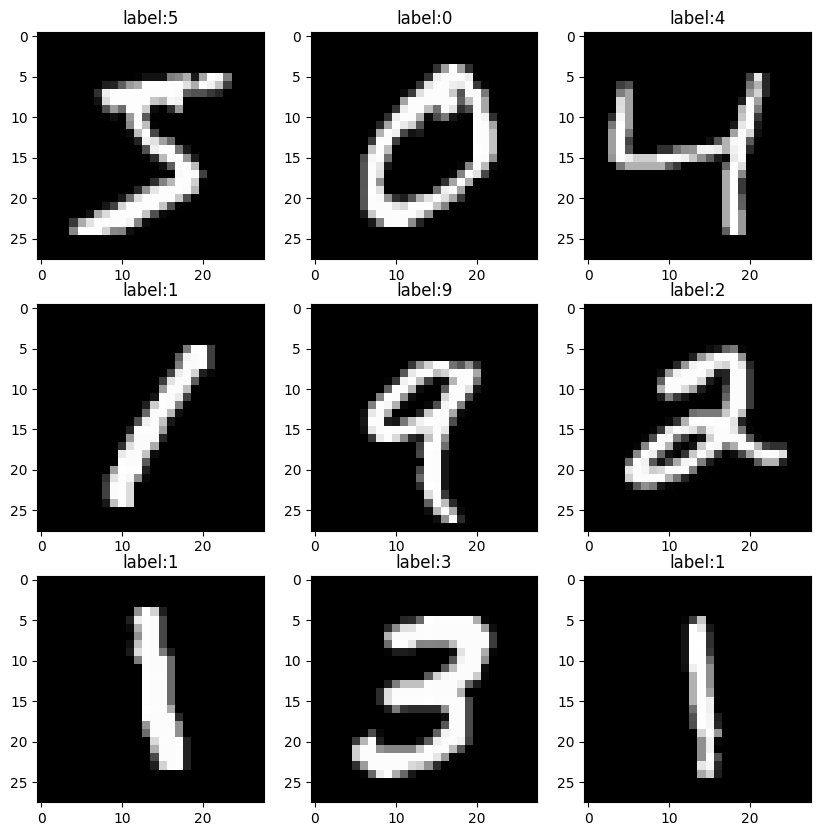

In [22]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i], cmap='gray')
  plt.title(f'label:{ytrain[i]}')

In [23]:
import numpy as np

In [24]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [25]:
len(np.unique(ytrain))

10

## Because i have more than 2 classes above becomes a multiclass classification problem

## Preprocessing the xtrain data

### Scale the x data divide by 255 to scale in between 0 to 1

In [26]:
xtrain_scl = xtrain.astype('float32')/255
xtest_scl = xtest.astype('float32')/255

### Apply one hot encoding on target feature because it multiclasss classification problem

In [27]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [28]:
ytrain_cat[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [29]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [31]:
ytest_cat[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [32]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

### Create a simple Covnet

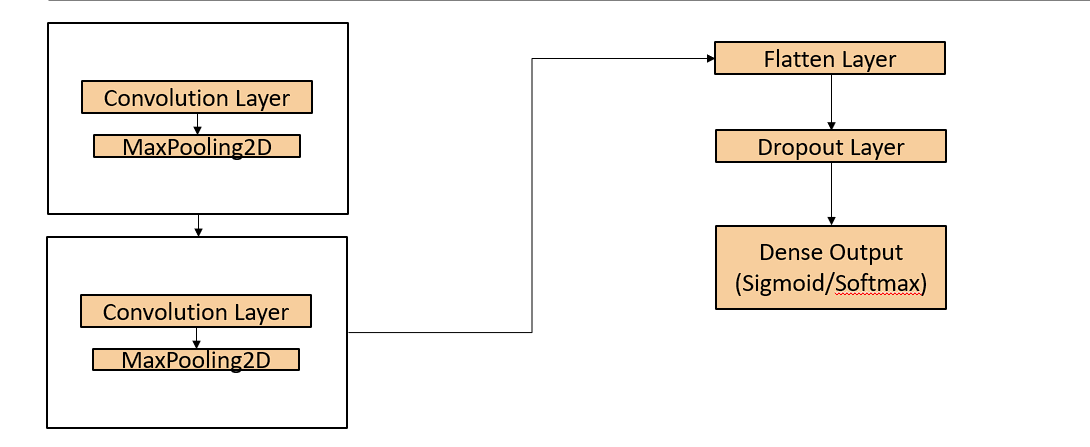

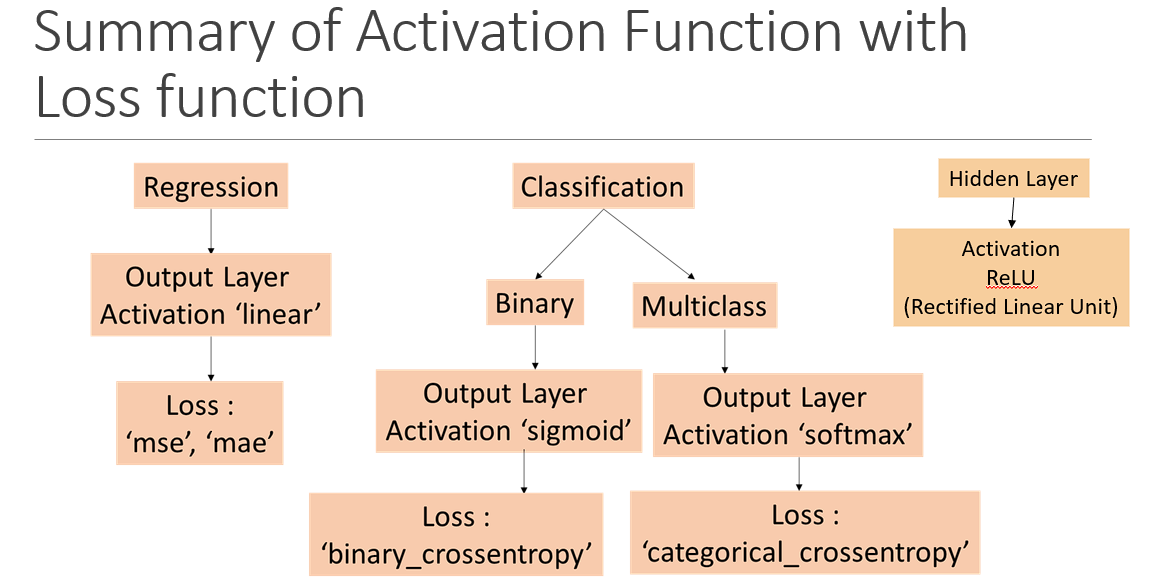

In [33]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [40]:
model = Sequential()

# Add Input layer
model.add(Input(shape=(28, 28, 1)))
# always add 1 extra layer as for filters

#Add Convolution Layer 1
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))

#add MaxPool layer 1
model.add(MaxPool2D(pool_size=(2,2)))

#add convolution layer 2
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

#add MaxPool layer 2
model.add(MaxPool2D(pool_size=(2,2)))

#add flatten layer
model.add(Flatten())

#Dropout layer
model.add(Dropout(rate=0.5))

# Dense layer Multiclass- Softmax
model.add(Dense(units=10, activation='softmax'))


In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             

## Compile the model

In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

## train the neural network

In [43]:
hist = model.fit(xtrain_scl, ytrain_cat, validation_split=0.1, epochs=15)

Epoch 1/15
1688/1688 [==============================] - 13s 4ms/step - loss: 0.2276 - accuracy: 0.9297 - val_loss: 0.0606 - val_accuracy: 0.9832
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0861 - accuracy: 0.9739 - val_loss: 0.0404 - val_accuracy: 0.9882
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0407 - val_accuracy: 0.9885
Epoch 4/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0565 - accuracy: 0.9822 - val_loss: 0.0388 - val_accuracy: 0.9888
Epoch 5/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0492 - accuracy: 0.9843 - val_loss: 0.0340 - val_accuracy: 0.9912
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0462 - accuracy: 0.9853 - val_loss: 0.0307 - val_accuracy: 0.9915
Epoch 7/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 0.0321 - val_accuracy

## Plot the learning curve for the model

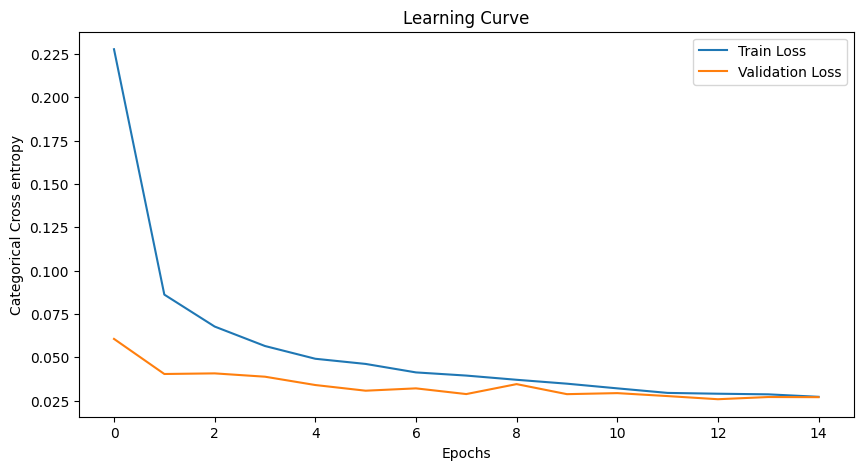

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross entropy')
plt.title('Learning Curve')
plt.legend()
plt.show()

## Evaluate model in train and test

In [45]:
model.evaluate(xtrain_scl, ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0109 - accuracy: 0.9967


[0.010910405777394772, 0.9966999888420105]

In [46]:
model.evaluate(xtest_scl, ytest_cat)

313/313 [==============================] - 2s 5ms/step - loss: 0.0244 - accuracy: 0.9915


[0.024404648691415787, 0.9915000200271606]

## Predict the probability for train and test

In [47]:
yprob_train = model.predict(xtrain_scl)
yprob_test = model.predict(xtest_scl)


313/313 [==============================] - 1s 2ms/step


In [48]:
yprob_train[0:5]

array([[5.00636642e-12, 3.99965922e-13, 3.61531811e-11, 2.78745320e-05,
        2.87456857e-16, 9.99971986e-01, 3.15058860e-15, 2.64211899e-11,
        3.86263155e-09, 1.02167476e-07],
       [9.99999404e-01, 1.39277985e-16, 2.31788690e-07, 2.00062189e-11,
        1.66534083e-12, 7.26210272e-11, 1.06255031e-08, 7.58155677e-14,
        9.31630773e-09, 3.91370861e-07],
       [1.17748697e-16, 3.12437969e-08, 7.82268583e-10, 6.95697059e-12,
        9.99991894e-01, 1.24703725e-09, 8.95626130e-13, 5.29044019e-06,
        3.99774880e-09, 2.88757610e-06],
       [7.59024843e-09, 9.99994397e-01, 1.19413940e-07, 1.50700969e-12,
        2.68431563e-06, 2.99840486e-10, 2.52531702e-08, 1.12341058e-06,
        1.64753612e-06, 7.31022354e-10],
       [5.00890670e-13, 6.90501432e-12, 3.05288406e-10, 1.56601820e-09,
        7.75085646e-05, 2.06474038e-09, 1.37772979e-16, 1.04806986e-06,
        1.00332290e-05, 9.99911427e-01]], dtype=float32)

In [49]:
yprob_test[0]

array([1.3691541e-10, 4.6565133e-13, 2.6140053e-06, 9.6276338e-08,
       6.1573786e-14, 8.4430614e-12, 4.5331238e-21, 9.9999690e-01,
       8.8719876e-10, 3.5557130e-07], dtype=float32)

## Predictions for train and test

In [50]:
import numpy as np
ypred_train = np.argmax(yprob_train, axis=1)
ypred_test = np.argmax(yprob_test, axis=1)

In [51]:
ypred_train[0:5]

array([5, 0, 4, 1, 9])

In [52]:
ytrain[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [53]:
ypred_test[0:5]

array([7, 2, 1, 0, 4])

In [54]:
ytest[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

## Plot confusion matrix

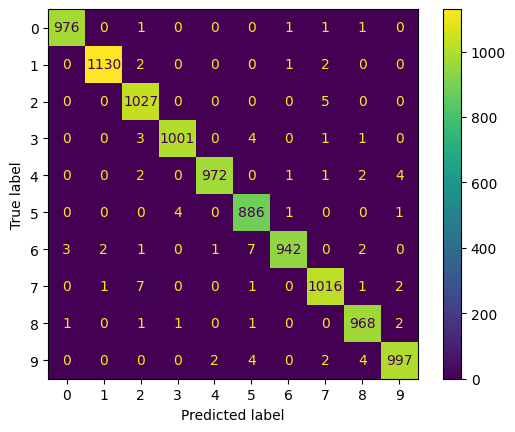

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       1.00      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [57]:
model.save('HandwrittenModel.keras')

## Load the model


In [58]:
from keras.models import load_model
m = load_model('/content/HandwrittenModel.keras')
m.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)             